# Code Examples from Lecture 7

The following notebook contains examples of data preprocessing using Python

## Sampling

In [1]:
import pandas as pd
data = pd.read_csv('diabetes.csv', header='infer')
data[:3]

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive

In [2]:
sample = data.sample(n=3)
sample

preg  plas  pres  skin  insu  mass   pedi  age            class
683     4   125    80     0     0  32.3  0.536   27  tested_positive
47      2    71    70    27     0  28.0  0.586   22  tested_negative
406     4   115    72     0     0  28.9  0.376   46  tested_positive

In [3]:
sample = data.sample(frac=0.005)
sample

preg  plas  pres  skin  insu  mass   pedi  age            class
533     6    91     0     0     0  29.8  0.501   31  tested_negative
174     2    75    64    24    55  29.7  0.370   33  tested_negative
88     15   136    70    32   110  37.1  0.153   43  tested_positive
565     2    95    54    14    88  26.1  0.748   22  tested_negative

## Unsupervised Discretization

In [4]:
data.mass.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: mass, dtype: float64

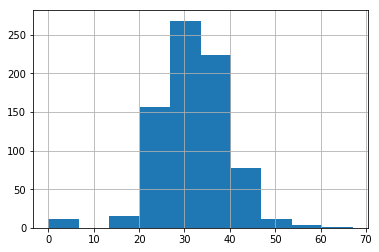

In [5]:
%matplotlib inline

data.mass.hist(bins=10)

In [6]:
bins = pd.cut(data.mass,5)
bins.head()

0    (26.84, 40.26]
1    (13.42, 26.84]
2    (13.42, 26.84]
3    (26.84, 40.26]
4    (40.26, 53.68]
Name: mass, dtype: category
Categories (5, interval[float64]): [(-0.0671, 13.42] < (13.42, 26.84] < (26.84, 40.26] < (40.26, 53.68] < (53.68, 67.1]]

In [7]:
bins = pd.qcut(data.mass,[0,0.2,0.4,0.6,0.8,1])
bins.head()

0      (30.1, 33.7]
1      (25.9, 30.1]
2    (-0.001, 25.9]
3      (25.9, 30.1]
4      (37.8, 67.1]
Name: mass, dtype: category
Categories (5, interval[float64]): [(-0.001, 25.9] < (25.9, 30.1] < (30.1, 33.7] < (33.7, 37.8] < (37.8, 67.1]]

## Principal Component Analysis

In [8]:
import pandas as pd
data = pd.read_csv('documents.csv', header='infer')
data.index = data['docID']
data = data.drop(columns=['docID'])
data

game  ball  play  win  result  election  vote  politics  health  \
docID                                                                    
1         4     2     5    1       1         0     0         0       0   
2         2     3     1    0       0         0     0         0       0   
3         1     0     3    0       0         0     0         0       0   
4         0     4     4    1       1         0     0         0       0   
5         0     0     0    1       1         4     3         1       0   
6         0     0     0    0       0         3     2         3       0   
7         0     0     0    1       1         3     3         0       0   
8         0     0     0    0       0         3     0         3       0   
9         0     0     0    0       0         0     0         0       1   
10        0     0     0    1       1         0     1         2       4   
11        0     0     0    0       0         0     0         0       2   
12        0     0     0    0       0         0     0         0       2   

       disease  flu  
docID                
1            0    0  
2            0    0  
3            0    0  
4            0    0  
5            0    0  
6            0    0  
7            0    0  
8            0    0  
9            3    2  
10           3    0  
11           3    3  
12           2    2

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data.values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
projected = pca.transform(data)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],
                         index=data.index)
projected

pc1       pc2
docID                    
1      5.317887 -0.573106
2      2.432503 -0.097635
3      2.089883 -0.061045
4      4.147813 -0.435207
5     -2.317800 -3.270850
6     -2.299879 -2.655223
7     -1.757609 -2.528383
8     -1.837906 -2.016353
9     -1.145034  2.830980
10    -2.074116  2.503578
11    -1.430837  3.578779
12    -1.124908  2.724465

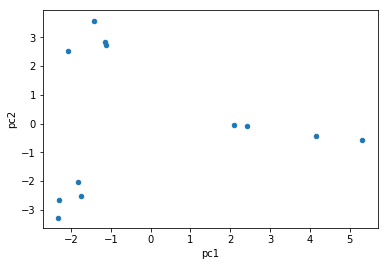

In [11]:
%matplotlib inline

projected.plot(kind='scatter',x='pc1',y='pc2')

In [12]:
comp = pd.DataFrame(pca.components_, columns=data.columns, index=['pc1','pc2'])
comp

game      ball      play       win    result  election      vote  \
pc1  0.344968  0.421939  0.634083  0.040528  0.040528 -0.329458 -0.230986   
pc2 -0.040296 -0.050275 -0.077266 -0.068046 -0.068046 -0.548344 -0.319435   

     politics    health   disease       flu  
pc1 -0.230733 -0.177858 -0.197984 -0.107945  
pc2 -0.194122  0.402394  0.508909  0.345406

Text(0.5,1,'2nd PC')

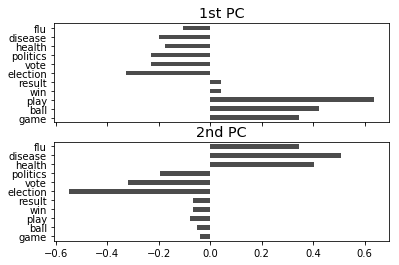

In [13]:
import matplotlib.pyplot as plt
from pandas import Series

fig,axes = plt.subplots(2,1,sharex=True)
comp.loc['pc1'].plot(kind='barh',ax=axes[0],color='k',alpha=0.7)
axes[0].set_title('1st PC', size = 'x-large')
comp.loc['pc2'].plot(kind='barh',ax=axes[1],color='k',alpha=0.7)
axes[1].set_title('2nd PC', size = 'x-large')

### Application of PCA to image data

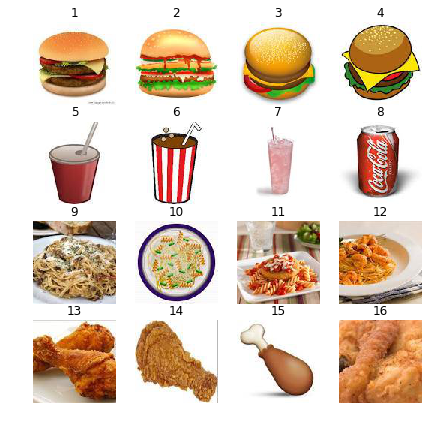

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
img = mpimg.imread('pics/Picture1.jpg')
imgData = np.array(img.flatten()).reshape(1,36963)
ax = fig.add_subplot(4,4,1)
plt.imshow(img)
plt.axis('off')
ax.set_title('1')

for i in range(1,numImages):
    filename = 'pics/Picture'+str(i+1)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i+1))
    data = np.array(img.flatten()).reshape(1,36963)
    imgData = np.concatenate((imgData,data),axis=0)

In [15]:
imgData.shape

(16, 36963)

In [16]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected

pc1          pc2
1   -1576.653420  6642.426575
2    -493.818121  6396.897821
3     990.174926  7237.925697
4    2189.786853  9049.045390
5   -7843.197595 -1063.787656
6   -8498.467187 -5439.486982
7  -11181.798004 -5318.499860
8   -6851.800289  1126.998333
9    7635.121730 -5043.954472
10   -708.058532  -528.769986
11   7236.253702 -5302.325324
12   4417.413359 -4658.852623
13  11864.491774  1472.393537
14     76.371218  1364.529134
15  -7505.615532 -1164.177632
16  10249.795119 -4770.361953

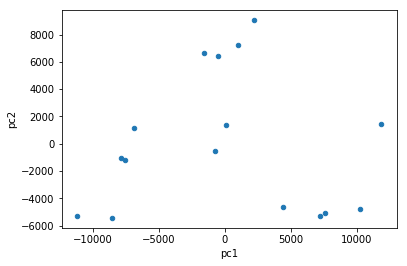

In [17]:
projected.plot(kind='scatter',x='pc1',y='pc2')